### Essential library download and import , and ignore the warnings

In [172]:
import warnings
warnings.filterwarnings("ignore")

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

### Load The dataset

In [174]:
df=pd.read_csv("chimpanzee.csv")

In [175]:
df.head()

,sequence,class
0,ATGCCCCAACTAAATACCGCCGTATGACCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTATTCGCTTCATTCGCTGCCCCCACAATCCTAG...,4
2,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
3,ATGGCCTCGCGCTGGTGGCGGTGGCGACGCGGCTGCTCCTGGAGGC...,4
4,ATGGGCAGCGCCAGCCCGGGTCTGAGCAGCGTGTCCCCCAGCCACC...,6


In [176]:
df.shape

(1682, 2)

### Check the missing value

In [177]:
df.isnull().sum()

sequence    0
class       0
dtype: int64

### Conclusion-1 
There is no missing value finding

### Encode the main sequece of DNA

In [178]:
from sklearn.preprocessing import LabelEncoder

def encode_sequence_label(seq):
    le = LabelEncoder()
    return le.fit_transform(list(seq))

df['encoded'] = df['sequence'].apply(encode_sequence_label)


In [179]:
df1 = pd.DataFrame(df['encoded'].to_list())

In [180]:
df1

,0,1,2,3,4,5,6,7,8,9,...,18911,18912,18913,18914,18915,18916,18917,18918,18919,18920
0,0,3,2,1,1,1,1,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,3,2,0,0,1,2,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,3,2,2,1,1,3,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,3,2,2,1,1,3,1,2,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,3,2,2,2,1,0,2,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1677,0,3,2,1,3,2,0,2,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1678,0,3,2,1,3,2,0,2,1,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1679,0,3,2,0,0,2,1,2,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1680,0,3,2,0,1,3,2,2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [181]:
df1.shape

(1682, 18921)

### Split the datset for build the model

In [182]:
x=df1.fillna(0)
y=df["class"]

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.70, test_size=0.2, random_state=100)

In [184]:
x_train.shape

(1177, 18921)

In [185]:
x_test.shape

(337, 18921)

In [186]:
y_train.shape

(1177,)

In [187]:
y_test.shape

(337,)

### Build the model

In [188]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [189]:
y_pred = knn.predict(x_test)

In [190]:
y_pred.shape

(337,)

### Chcek the clssification report

In [191]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.38      0.43        53
           1       0.36      0.56      0.44        36
           2       0.50      0.23      0.31        35
           3       0.75      0.19      0.30        48
           4       0.37      0.19      0.25        59
           5       0.83      0.25      0.38        20
           6       0.39      0.80      0.52        86

    accuracy                           0.42       337
   macro avg       0.53      0.37      0.38       337
weighted avg       0.49      0.42      0.39       337

[[20  6  1  0  4  0 22]
 [ 5 20  2  1  2  0  6]
 [ 1  9  8  2  4  0 11]
 [ 2  7  0  9  4  0 26]
 [ 5  3  0  0 11  0 40]
 [ 3  4  2  0  2  5  4]
 [ 4  6  3  0  3  1 69]]


### K_means Clustering

In [192]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [193]:
pca = PCA(n_components=2)
x_pca = pca.fit_transform(x)

In [194]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=100)
labels = kmeans.fit_predict(x_pca)

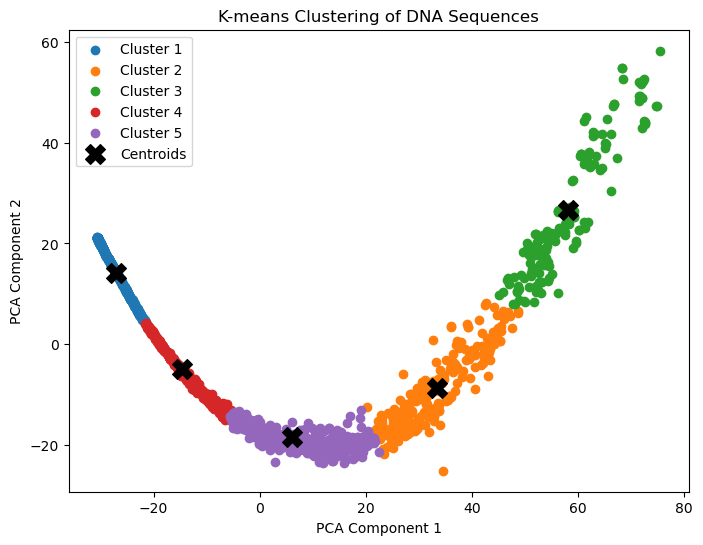

In [195]:
plt.figure(figsize=(8,6))
for cluster in range(k):
    plt.scatter(x_pca[labels == cluster, 0], x_pca[labels == cluster, 1], label=f'Cluster {cluster+1}')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.title('K-means Clustering of DNA Sequences')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

In [196]:
print("PCA Components (directions):")
print(pca.components_)

PCA Components (directions):
[[ 1.11711836e-03 -9.31690280e-04  6.02611237e-05 ...  1.72653491e-04
   0.00000000e+00  1.15102327e-04]
 [ 2.31322394e-04  5.49447341e-04  6.37676645e-04 ...  4.01712755e-04
   0.00000000e+00  2.67808503e-04]]


In [123]:
print("\nExplained variance ratio (how much info each component keeps):")
print(pca.explained_variance_ratio_)


Explained variance ratio (how much info each component keeps):
[0.2040294  0.06774289]


## MAIN CONCLUSION
In this DNA sequence analysis project, we explored the classification and clustering of chimpanzee DNA sequences using machine learning techniques. Here’s a summary of the key findings and outcomes:

1. Data Preparation and Encoding
The dataset contained 1,682 DNA sequences, each labeled with a class.

There were no missing values, ensuring data integrity.

Sequences were encoded numerically to facilitate machine learning model input.

2. Classification with K-Nearest Neighbors (KNN)
The KNN classifier (with 6 neighbors) was trained on 70% of the data and tested on the remaining 30%.

Performance Metrics:

Accuracy: 42%

Precision, Recall, and F1-scores varied across classes, with some classes (like class 6) performing better than others.

The confusion matrix showed significant misclassification, indicating overlapping features among classes or potential data imbalance.

Interpretation:
While the model achieved moderate accuracy, the relatively low F1-scores for most classes suggest that further feature engineering, model tuning, or alternative algorithms may be needed for improved performance.

3. Clustering with K-Means and Dimensionality Reduction
Principal Component Analysis (PCA) reduced the high-dimensional sequence data to 2 principal components, capturing the most significant variance.

K-means clustering (k=5) was applied to the PCA-reduced data, and visualizations showed distinct clusters, though some overlap was present.

